In [1]:
from IPython.display import Image
from IPython.display import Audio

import emoji


# define rooms and items

door_a = {
    "name": "door a",
    "type": "door",
}
door_b = {
    "name": "door b",
    "type": "door",
}
door_c = {
    "name": "door c",
    "type": "door",
}
door_d = {
    "name": "door d",
    "type": "door",
}
key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}
key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}
key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}
key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}
bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}
bedroom_2 = {
    "name": "bedroom 2",
    "type": "room",
}
living_room = {
    "name": "living_room",
    "type": "room",
}
game_room = {
    "name": "game room",
    "type": "room",
}
dinning_table = {
    "name": "dinning table",
    "type": "furniture",
}
couch = {
    "name": "couch",
    "type": "furniture",
}
fridge = {
    "name": "fridge",
    "type": "furniture",
}
backpack = {
    "name": "backpack",
    "type": "furniture",
}
double_bed = {
    "name": "double bed",
    "type": "furniture",
}
dinning_table = {
    "name": "dinning table",
    "type": "furniture",
}
ping_pong = {
    "name": "ping pong",
    "type": "trap",
}
tv = {
    "name": "tv",
    "type": "furniture",
}
freedoom = {
  "name": "freedoom"
}
key_trap = {
    "name": "trap",
    "type": "trap",
}


# variables according to each room
all_rooms = [game_room, bedroom_1, bedroom_2, living_room, freedoom]
all_doors = [door_a, door_b, door_c, door_d]
# define which items/rooms are related
object_relations = {
    "game room": [couch, fridge, door_a],
    "fridge": [key_a],
    "bedroom_1": [door_a],
    "door a": [game_room, bedroom_1],
    "bedroom 1": [dinning_table, door_b, door_c],
    "dinning table": [key_b],
    "door b": [bedroom_1, bedroom_2],
    "bedroom 2": [double_bed, backpack, door_b],
    "double bed": [key_c],
    "backpack": [key_d],
    "door b": [bedroom_2, bedroom_1],
    'living_room': [ping_pong, door_d, door_c, tv],
    'door c': [bedroom_1, living_room],
    'door d': [living_room, freedoom],
    'ping_pong': [key_trap],
    'tv': [],
}


# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": bedroom_1
}


def trapfunction():
    game_state = INIT_GAME_STATE.copy()
    start_game()

def linebreak():
    print("\n\n")

def start_game():
    print(emoji.emojize(" You wake up on a IronHack couch f. wasted after Ironbeers :beers: and find yourself in a strange house, that you have never been to. The house is dark and has no windows. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!", use_aliases=True))
    display(Image(filename='layout.jpg')) 
    display(Audio("game.mp3"))
    play_room(game_state["current_room"])

def play_room(room):
    game_state["current_room"] = room
    if(game_state["current_room"] == freedoom):
        print(emoji.emojize("You have escaped Ironhack's hauted house.You are Free! See you in the next Ironbeers :beer:", use_aliases=True))
        display(Image(filename='yes.gif')) 
    else:
        print("You are now in " + room["name"])
        intended_action = input("What would you like to do? Type 'e' to explore or 'i' to inspect?").strip()
        if intended_action == "e":
            explore_room(room)
            play_room(room)
        elif intended_action == "i":
            examine_item(input("Which object would you like to inspect?").strip())
        else:
            print(emoji.emojize("Not sure what you mean. Python can´t read gibberish. :rage: Please type 'e' to explore or 'i' to inspect.", use_aliases=True))
            play_room(room)
        linebreak()

def explore_room(room):
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You inspect " + item_name + ". "
            if(item["type"] == "trap"):
                output += "You got drunk again."
                print ("Oh NO!You got drunk again.")
                display(Image(filename='drunk.gif'))
                
                trapfunction()
                
            elif(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it. Keep searching or you will perish here!!!"
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Enter 'y' for yes or 'n' for no").strip() == 'y'):
        play_room(next_room)
    else:
        play_room(current_room)

        
        
# start bedroom_1

#game_state = INIT_GAME_STATE.copy()

#start_game()



 You wake up on a IronHack couch f. wasted after Ironbeers 🍻 and find yourself in a strange house, that you have never been to. The house is dark and has no windows. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!


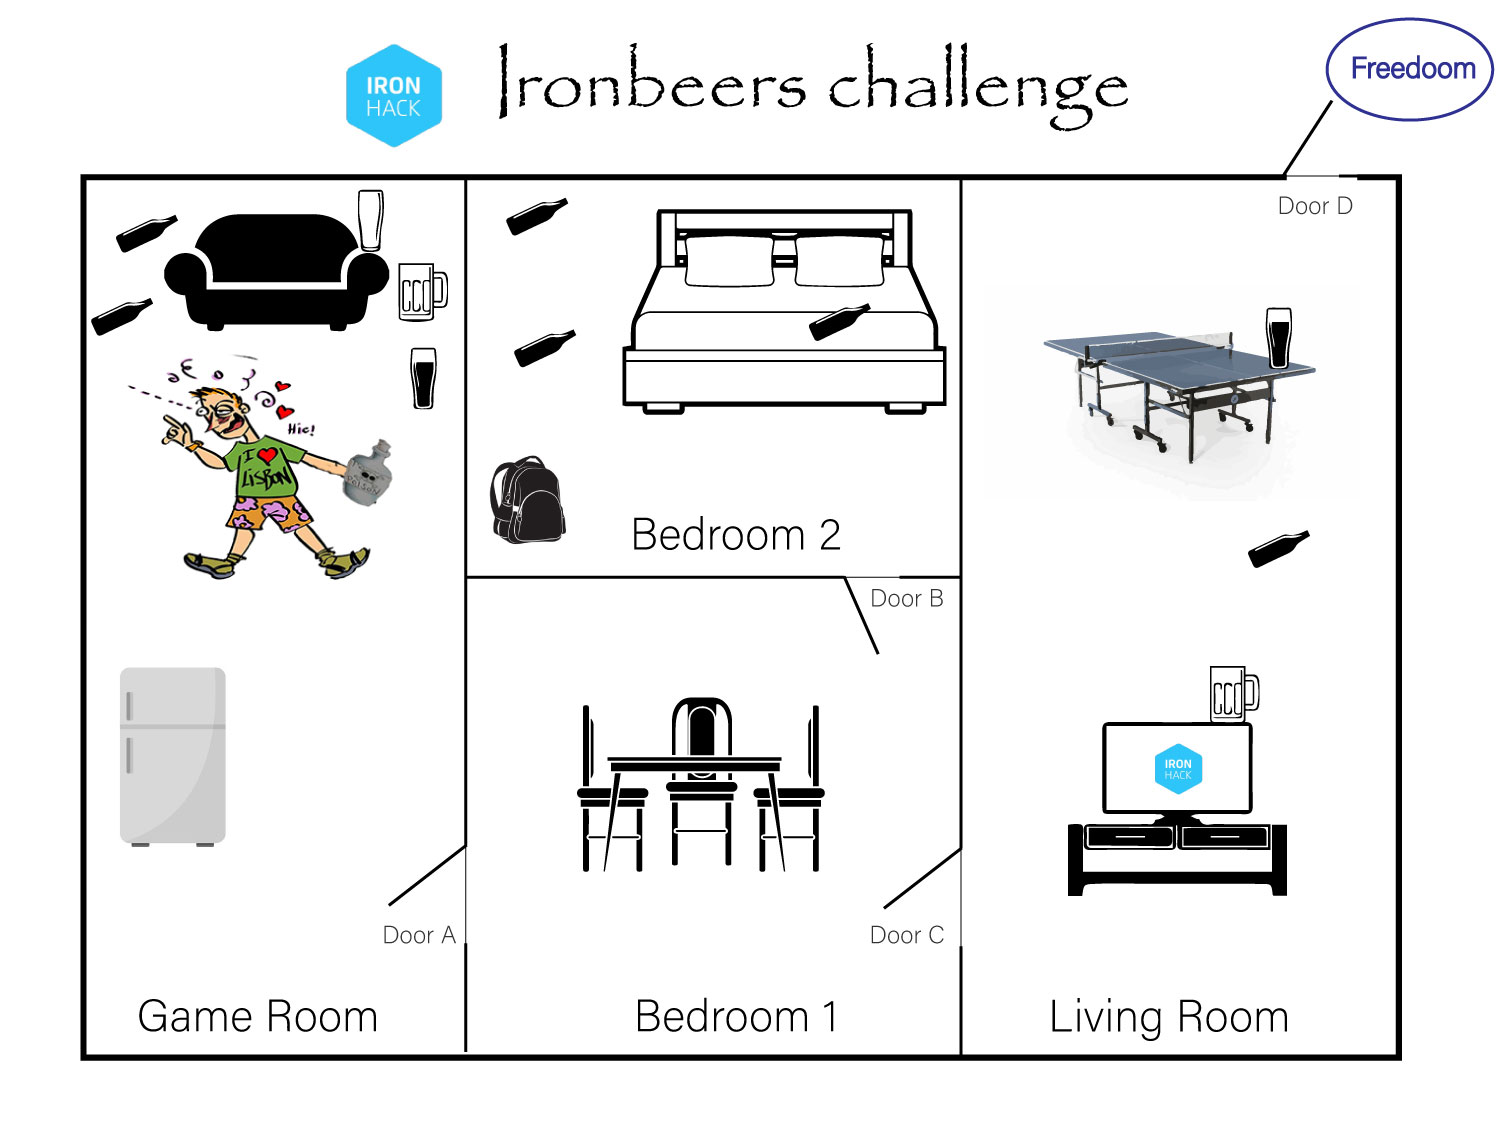

You are now in game room
What would you like to do? Type 'e' to explore or 'i' to inspect?ujjj
Not sure what you mean. Python can´t read gibberish. 😡 Please type 'e' to explore or 'i' to inspect.
You are now in game room


In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()